In [243]:
# Imports
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import smbclient
import os
import tempfile

In [244]:
smb_server_ip = os.environ['SMB_SERVER_IP']
smb_server_port = int(os.environ['SMB_SERVER_PORT'])
smb_username = os.environ['SMB_USERNAME']
smb_password = os.environ['SMB_PASSWORD']
smb_share_name = os.environ['SMB_SHARE_NAME']

remote_term_df_path = 'apple_term_df_compressed.csv.gz'
remote_bigram_df_path = 'apple_bigram_df_compressed.csv.gz'

# Set the SMB client configuration with the provided credentials
smbclient.ClientConfig(username=smb_username, password=smb_password)

def download_dataframe_from_smb_server(remote_file_path):
    # Create the full remote path
    remote_path = f"\\\\{smb_server_ip}\\{smb_share_name}\\{remote_file_path}"

    # Download the compressed CSV file from the SMB share
    with tempfile.NamedTemporaryFile(mode='w+b', suffix='.csv.gz', delete=False) as temp_file:
        with smbclient.open_file(remote_path, mode='rb') as remote_file:
            temp_file.write(remote_file.read())
        temp_file_path = temp_file.name

    # Load the temporary compressed CSV file into a pandas DataFrame
    df = pd.read_csv(temp_file_path, compression='gzip')

    # Delete the temporary file
    os.unlink(temp_file_path)

    return df

# Download both DataFrames from the SMB server
term_df = download_dataframe_from_smb_server(remote_term_df_path)
bigram_df = download_dataframe_from_smb_server(remote_bigram_df_path)

In [245]:
term_df.head()

,aal,aap,aapl,aaplo,abandon,abc,abil,abl,abroad,absolut,...,york,yorkbas,young,youtub,yy,zack,zackscom,zero,zone,zuckerberg
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
bigram_df.head()

,aap team,aapl amazon,aapl appl,aapl base,aapl facebook,aapl free,aapl iphon,aapl microsoft,aapl open,aapl post,...,yearoveryear growth,yield appl,yield benchmark,yield rise,yield year,zack consensu,zack invest,zack rank,zack research,zack stock
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
import matplotlib.pyplot as plt
def plot_explained_variance(dataframes, titles, n_components=100):
    plt.figure(figsize=(10, 6))
    
    for df, title in zip(dataframes, titles):
        svd = TruncatedSVD(n_components=n_components)
        svd.fit(df)

        explained_variance = np.cumsum(svd.explained_variance_ratio_)

        plt.plot(range(1, n_components + 1), explained_variance, label=title)
    
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend()
    plt.grid()
    plt.show()

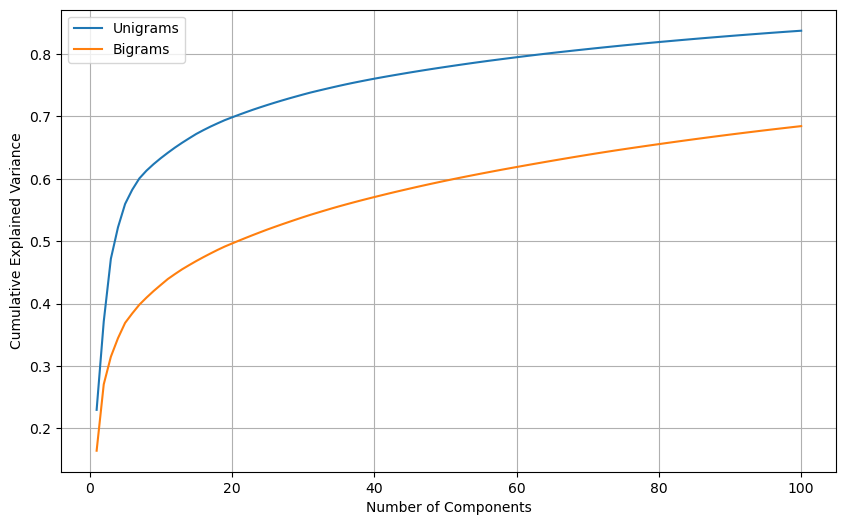

In [248]:
plot_explained_variance([term_df, bigram_df], ['Unigrams', 'Bigrams'])

In [249]:
svd_term = TruncatedSVD(n_components=20, random_state=42)
reduced_term_df = svd_term.fit_transform(term_df)

reduced_term_df = pd.DataFrame(reduced_term_df)
reduced_term_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.835838,-8.564065,2.061672,5.870961,10.102144,1.321136,5.115033,-5.970342,-7.556570,1.089882,-6.210717,3.269575,-2.034044,0.521635,4.307985,1.859377,-2.602390,-0.996140,-1.775209,8.398277
1,4.561257,-9.232224,-1.085018,10.955252,-11.223690,4.310956,-6.229751,2.627371,-5.114695,-2.009498,-0.949328,0.583927,-4.079845,1.489125,-3.316283,1.398703,-2.110306,-1.338904,0.403202,-0.511788
2,1.251632,-1.777141,-0.279295,1.734947,1.603383,-1.103175,1.778319,1.690844,-0.401204,-0.492417,1.807768,0.094686,0.639017,-0.290532,-0.928761,-1.629336,-1.015798,0.572640,0.356316,0.875529
3,5.670436,-7.915228,0.917333,6.874347,7.524113,-4.198535,2.487156,4.447859,1.759532,-7.502760,4.237751,-3.750787,-7.373691,1.469235,7.586388,8.043309,6.339036,-4.338529,3.524344,4.482794
4,20.730663,-35.714544,-3.178563,2.605502,-18.004628,0.976423,4.560678,0.700142,3.258442,-3.466274,-1.282063,3.786032,-1.461533,0.413488,0.372366,1.875710,-0.730144,-0.574735,1.453044,-0.477275


In [250]:
svd_bigram = TruncatedSVD(n_components=60, random_state=42)
reduced_bigram_df = svd_bigram.fit_transform(bigram_df)

reduced_bigram_df = pd.DataFrame(reduced_bigram_df)
reduced_bigram_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.488307,0.335288,0.031293,-0.625010,0.611381,1.575769,2.743643,-0.121616,-1.566745,0.327584,...,-0.495408,1.320916,0.049871,-1.549378,-1.229407,-0.370541,-1.074258,-0.228921,-0.320513,0.594406
1,0.118576,-0.075493,0.000713,-0.042894,-0.003260,0.534101,-0.004230,0.095710,-0.008785,0.152442,...,0.007390,-0.233682,0.046768,0.136617,0.482409,-0.069106,-0.196743,-0.328213,0.356692,-0.442667
2,0.016839,0.020124,0.001331,0.010696,0.012370,0.170194,0.146802,-0.048343,-0.067591,0.025282,...,0.216384,-0.281530,0.000855,-0.090403,-0.111450,-0.124043,-0.031592,0.043158,-0.102513,-0.006871
3,0.186904,0.003281,0.001094,0.023226,-0.018796,0.431203,0.283355,-0.268064,-0.100923,-0.212969,...,0.034904,0.387432,-0.118664,-0.231730,-0.223006,0.042610,0.000280,0.059958,-0.096497,-0.176345
4,15.382811,-5.971098,0.243471,-0.769293,1.958158,-0.125001,0.640396,-0.926770,0.144773,-6.464424,...,-1.147539,-0.528204,-0.801162,-0.056709,0.276406,-0.844498,0.753341,-0.973060,-0.744514,-2.151931


In [251]:
def save_dataframe_to_smb_server(df, remote_file_path):
    # Create a temporary file to store the compressed CSV
    with tempfile.NamedTemporaryFile(mode='w+', suffix='.csv.gz', delete=False) as temp_file:
        df.to_csv(temp_file.name, index=False, compression='gzip')
        temp_file_path = temp_file.name

    # Create the full remote path
    remote_path = f"\\\\{smb_server_ip}\\{smb_share_name}\\{remote_file_path}"

    # Upload the temporary compressed CSV file to the SMB share
    with open(temp_file_path, 'rb') as local_file:
        with smbclient.open_file(remote_path, mode='wb') as remote_file:
            remote_file.write(local_file.read())

    # Delete the temporary file
    os.unlink(temp_file_path)

# Save both DataFrames to the SMB server
save_dataframe_to_smb_server(reduced_term_df, 'apple_term_df_reduced_compressed.csv.gz')
save_dataframe_to_smb_server(reduced_bigram_df, 'apple_bigram_df_reduced_compressed.csv.gz')